In [7]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from settings import *
from glob import glob

In [8]:
def import_all_data(root: str) -> dict:
    result = {}
    if root[-1] != '/':
        root += '/'
    for filetype in FILE_TYPES:
        result[filetype] = import_data(root=root, filetype=filetype)
    return result

In [9]:
def import_data(root:str, filetype: str) -> list:
    files = glob(f'{root}*-{filetype}.csv')
    file = files[0]
    with open(file, 'r') as f:
        reader = csv.reader(f)
        csv_data = [row for row in reader]
    header = csv_data[0]
    data = [list(map(float, row)) for row in csv_data[1:]]
    return [header] + data

In [10]:
def visualize_sensor_data(sensor_data: dict) -> dict:
    for sensor_tyoe in sensor_data.keys():
        df = pd.DataFrame(sensor_data[sensor_tyoe][1:], columns=sensor_data[sensor_tyoe][0])
        df['time'] = [i / 10.0 for i in list(df.index)]
        fig = plt.figure(figsize=(30, 5))
        fig.suptitle(sensor_tyoe)
        for idx, axis in enumerate(df.columns[:-1]):
            ax = fig.add_subplot(1, 3, idx+1)
            ax.set_title(axis)
            ax.plot(df['time'], df[axis])
        plt.show()

In [11]:
def main(root: str):
    imported_data = import_all_data(root=root)
    visualize_sensor_data(sensor_data=imported_data)

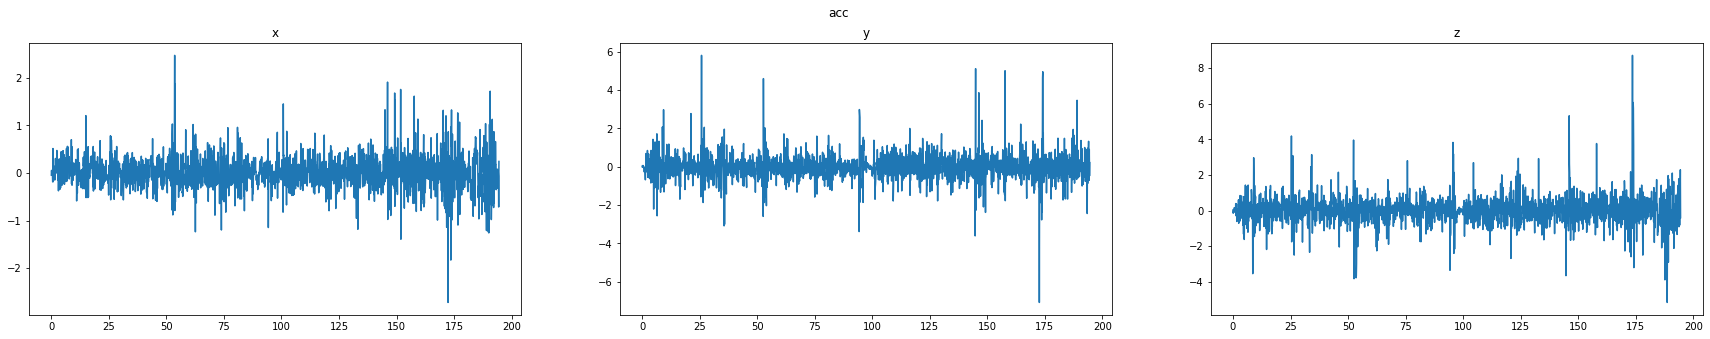

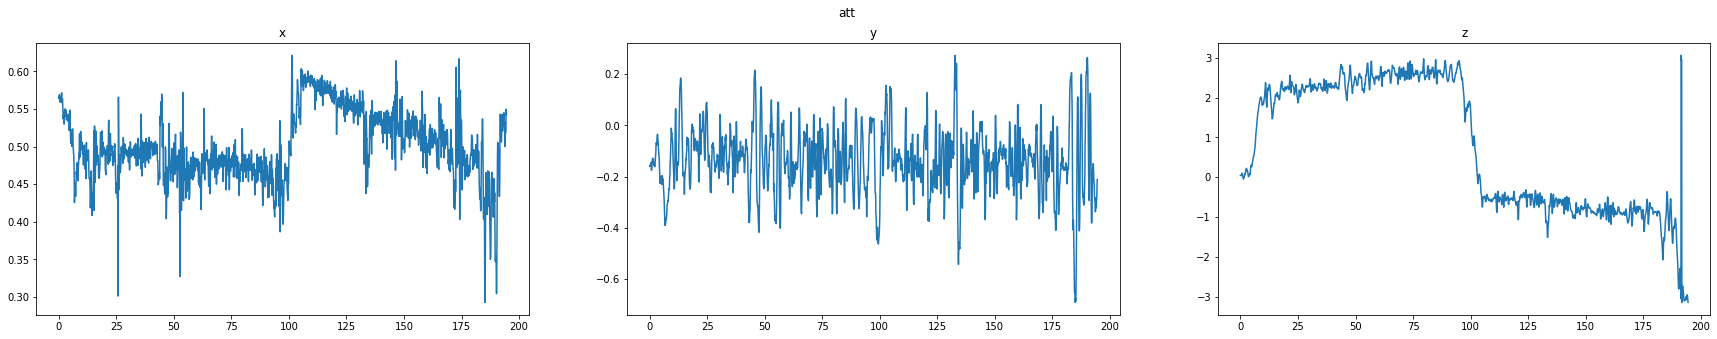

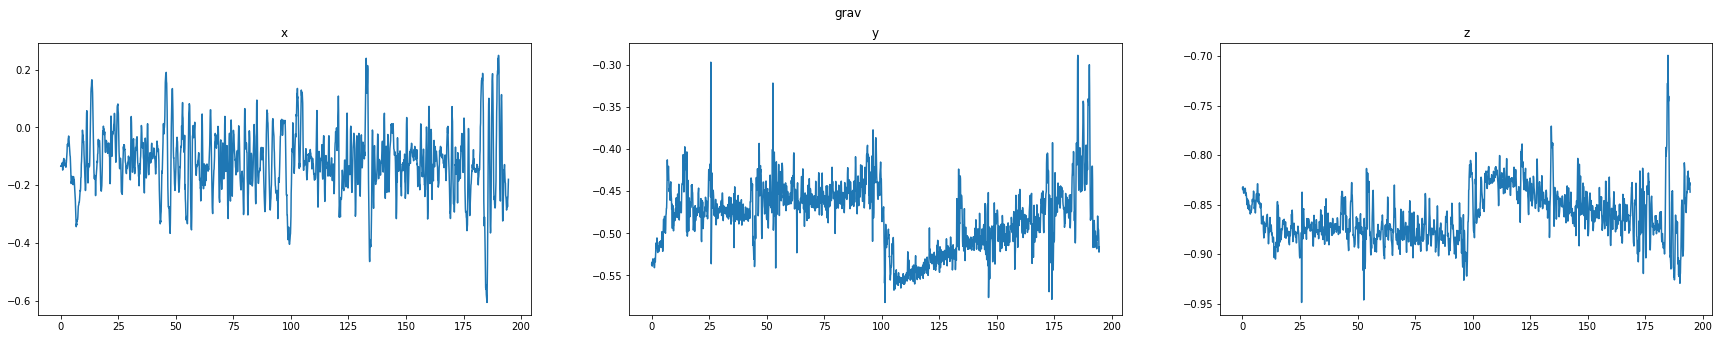

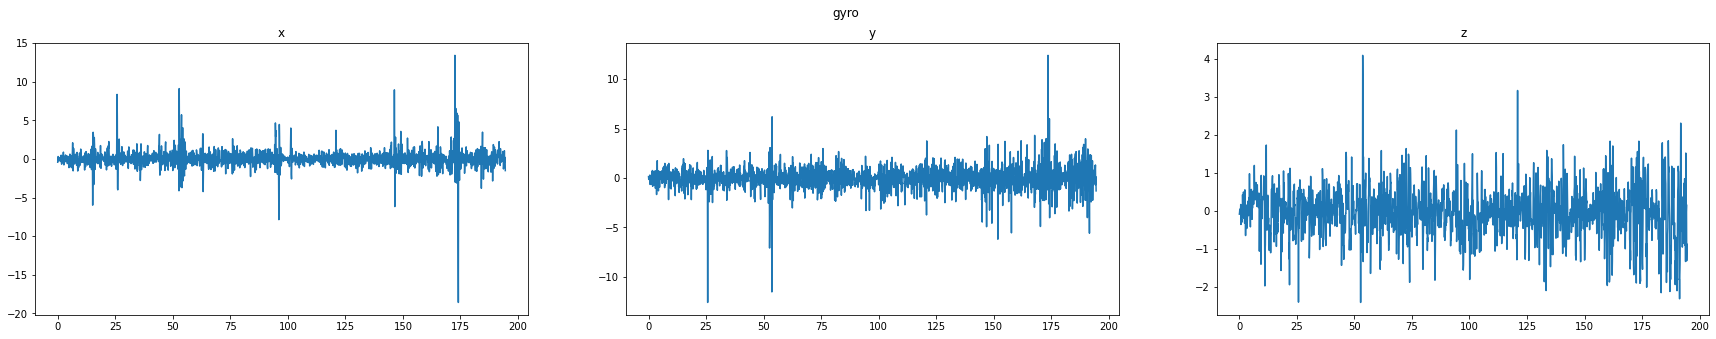

In [12]:
root = 'data'
main(root=root)